In [1]:
# coding=utf-8
# This is a sample Python script.

# Press Shift+F10 to execute it or replace it with your code.
# Press Double Shift to search everywhere for classes, files, tool windows, actions, and settings.
import numpy as np
import matplotlib.pyplot as plt
import math
from IPython.display import clear_output
import tqdm
from tqdm import tqdm
import serial

In [55]:
#THIS IS DATA FROM ARDUINO
ser = serial.Serial(
    port = '/dev/ttyUSB0', 
    baudrate = 9600,
    bytesize = serial.EIGHTBITS
)

while(ser.inWaiting()):
    data = ser.read(ser.inWaiting())
    print(data)
    plt.imshow(data, cmap="plasma")
    plt.colorbar()
    plt.show()
    
ser.close()


SerialException: could not open port '/dev/ttyUSB0': FileNotFoundError(2, 'The system cannot find the path specified.', None, 3)

In [53]:
#THIS IS COMPUTATIONAL MODEL
# Press the green button in the gutter to run the script.
def main_function(ti,tf):
    if __name__ == '__main__':
        rho = 2710 # mass density
        cp = 0.89 # heat capacity
        k = 239 # thermal conductivity
        n = 100 # time steps
        del_x = 0.029 # spatial step
        del_t = 0.002
        mesh_fourier_num = k * del_t / (cp * rho * del_x**2)


        rows, cols = (100, 100)
        arr_old = np.array([[20 for i in range(cols)] for j in range(rows)], dtype = float)
        arr_old[0][:] = 20
        arr_old[-1][:] = 20
        for row in range(rows):
            arr_old[row][0] = 20
            arr_old[row][-1] = 20
        arr_old[50, 20] = 75
        arr_old[10, 90] = 0

        arr_new = arr_old.copy()

        for t in range(ti, tf):
            for x in range(1, rows - 1):
                #print("x: " + str(x))
                for y in range(1, cols - 1):
                    #print("y: " + str(y))
                    #print(arr_old[x][y])
                    arr_new[x][y] = (1 - 4*mesh_fourier_num)*arr_old[x][y]+ \
                    mesh_fourier_num*(arr_old[x+1][y]+arr_old[x][y+1]+ \
                    arr_old[x-1][y]+arr_old[x][y-1])
                    #print("arr_new[x][y]: " + str(arr_new[x][y]))
                    #print("first part: " + str((1 - 4*mesh_fourier_num)*arr_old[x][y]))
                    #print("second part: " + str(mesh_fourier_num*(arr_old[x+1][y]+arr_old[x][y+1]+ \
                    #arr_old[x-1][y]+arr_old[x][y-1])))


                    #clear_output(wait=True)
            arr_old = arr_new

        #print(arr_old)
        #print(arr_new)
        arr_truncated = arr_new
        arr_truncated = np.delete(arr_truncated, (0), axis = 1)
        arr_truncated = np.delete(arr_truncated, (-1), axis = 1)
        arr_truncated = np.delete(arr_truncated, 0, axis = 0)
        arr_truncated = np.delete(arr_truncated, -1, axis = 0)
        #print(arr_truncated)

        plt.imshow(arr_truncated, cmap="plasma")
        plt.colorbar()
        plt.show()


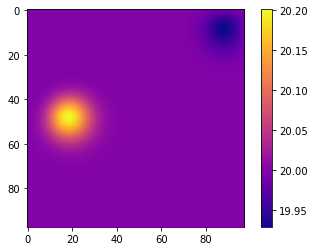

100%|██████████████████████████████████████████████████████████████████████████████████| 50/50 [01:42<00:00,  2.06s/it]


In [54]:
#time_arr=np.linspace(0,10,10)
#print(len(time_arr))
new_point=0
for i in tqdm(range(50)):
    new_point+=1
    clear_output(wait=True)
    main_function(0,new_point)
    